# Airbnb Los Angeles Dataset Analysis

In [1]:
# Import linear algebra and data manipulation
import numpy as np
import pandas as pd
import datetime

# Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split the data into train, crossvalidation, test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Introduction

I have been to Los Angeles for several times. Everytime I choose a suitable accomodation for traveling is one of the most concert problem. When it comes to the decision of accomodation, there are many factors and the reservation price is one of them. For me, there are always several important features that I will think about before making decision： <br /><br />1. What is the average rental price in the area i want to visit? 
<br />2. What time period is the busiest time during the whole year in los angeles? 
<br />3. How is the feature of the lising house affecting the listing price? 
<br /><br />So in this notebook, I will conduct a reservation price analysis based on the Airbnb dataset.

## Approach and Methods

In this project, I choose Los Angeles dataset from airbnb in Sep.2019. <br />
Below are my steps for making conclusion based on the data analysis of factors affecting the reservation prices:
<br /><br />
1.Business Understanding<br />
·What are the busiest times of the year to visit los angeles?<br />
·How is the reservation price affected by neighbourhood?<br />
·Which are the most relevant features on house rental prices?<br />
<br />
2.Data Understanding<br />
·Getting a glimpse on the dataset<br />
·Looking into the informations we have in the dataset<br />
·Handling the informations with missing values<br />
<br />
3.Data Preparation<br />
·Gather necessary data for data analyst<br />
·Removing the irrelevant information<br />
<br />
4.Data Modeling<br />
·Applying several machine learning algorithm for further analysis<br />
<br />
5.Result and Conclusion<br />

For some methods applied in this project, I refer to the methods using in <br />https://www.kaggle.com/aleksandradeis/airbnb-seattle-reservation-prices-analysis
<br />
https://www.kaggle.com/cliffcheng/seattle-airbnb-intro-analysis
<br />
https://www.kaggle.com/kaushikjag/airbnb-seattle-new-host-pricing-tip-prediction
<br />
And also the methods in Udacity Data Science nanodegree course<br />
https://www.udacity.com/course/data-scientist-nanodegree--nd025

## Data Understanding

  Based on the airbnb dataset online (http://insideairbnb.com/get-the-data.html), there are three types of dataset which are avilable.
<br />

### Listing Dataset

#### listing.csv<br />
summary house information on listing in Los Angeles such as: location, host information, cleaning and guest fees, amenities etc.

In [2]:
# use pd.read_csv to read data
listings_df= pd.read_csv("listings.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20190914032935,2019-09-14,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20190914032935,2019-09-14,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,t,f,flexible,f,f,1,1,0,0,0.15
2,2708,https://www.airbnb.com/rooms/2708,20190914032935,2019-09-14,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.33
3,2732,https://www.airbnb.com/rooms/2732,20190914032935,2019-09-14,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.19
4,2864,https://www.airbnb.com/rooms/2864,20190914032935,2019-09-14,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN


In [4]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In order to get a better understanding of the data, let's take a look at some of the characteristics of the dataset and check the basic information in the dataset

In [5]:
listings_number = listings_df['id'].count()
hosts_number = len(listings_df['host_id'].unique())
print('listings.csv dataset contains information on %d listings provided by %d hosts.' % (listings_number,                                                                                          hosts_number))

listings.csv dataset contains information on 45053 listings provided by 26286 hosts.


The missing value statistics in the listings.csv are shown below

In [6]:
# Setting up functions for finding the missing value in the dataset
def finding_missing_value(df):
  #find percentage of missing values for each column
    missing_df = df.isnull().mean()*100
    #filter out only columns, which have missing values
    with_nan_df = missing_df[missing_df > 0]
    return with_nan_df

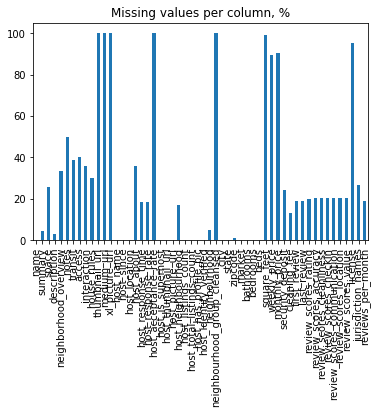

In [7]:
#plot the results
with_nan_df_1= finding_missing_value(listings_df)
with_nan_df_1.plot.bar(title = 'Missing values per column, %')

###  Calendar Dataset

#### calendar.csv<br />
calendar data for the listings: availability dates, price for each date.
<br />
<br />

Check the basic information in the dataset

In [8]:
#read the dataset
calendar_df = pd.read_csv('calendar.csv')

In [9]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,109,2019-09-14,f,$115.00,$115.00,30,730
1,109,2019-09-15,f,$115.00,$115.00,30,730
2,109,2019-09-16,f,$115.00,$115.00,30,730
3,109,2019-09-17,f,$115.00,$115.00,30,730
4,109,2019-09-18,f,$115.00,$115.00,30,730


In [10]:
calendar_df.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [11]:
#find number of rows in dataset
rows_num = calendar_df.shape[0]

#find first and last date of the calendar
min_date = calendar_df['date'].min()
max_date = calendar_df['date'].max()

print('calendar.csv dataset contains %d rows.' % (rows_num))
print('The first date of observation is %s and the last date is %s.' % (min_date, max_date))

calendar.csv dataset contains 16444345 rows.
The first date of observation is 2019-09-14 and the last date is 2020-09-12.


The missing value statistics in the calendar.csv are shown below

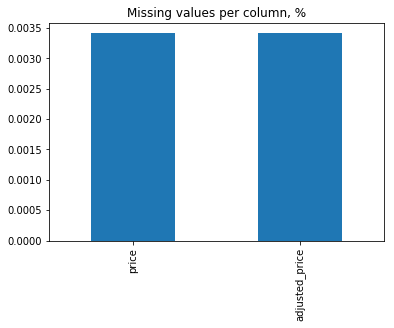

In [12]:
with_nan_df_2 = finding_missing_value(calendar_df)
with_nan_df_2.plot.bar(title = 'Missing values per column, %')

As it shows on the graph, only few missing value in both price and dujusted priced

### Review Data

#### Reviews.csv
<br /> review summary data for the listings, which won't be helpful in this situation.

In [13]:
reviews_df = pd.read_csv('reviews.csv')

In [14]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,344,79805581,2016-06-14,2089550,Drew & Katie,We really enjoyed our stay here in Burbank! Th...
3,344,120725697,2016-12-11,32602867,Christopher,I had a ton of fun learning to play Go with Fu...
4,344,123800867,2016-12-30,35822259,May,The host canceled this reservation the day bef...


In [15]:
reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

According to the information in the form. This dataset won't be used for the analysis in this notebook

## Data Preparation

To pre-processed the dataset, the following steps are needed:
<br />
·Removing the null data<br />
·The irrelevant columns with missing data should be removed or filled before model fitting<br />
·Converting string types/object types columns to numeric<br />

In [16]:
# Removing null values
calendar_df.dropna(axis=0,subset=['price'],inplace = True)

In [17]:
# Transfer date string into number of year, month, date
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar_df['month'] = calendar_df.date.dt.month
calendar_df['year'] = calendar_df.date.dt.year
calendar_df['day'] = calendar_df.date.dt.day

In [18]:
# Convert price to number
def price_cleaning(df,column):
    df[column] = pd.to_numeric(df[column].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
    return df[column].head()

In [19]:
# Converting the price in calendar_df
price_cleaning(calendar_df,'price')

0    115.0
1    115.0
2    115.0
3    115.0
4    115.0
Name: price, dtype: float64

In [20]:
# Converting the price related columns in listings_df
for items in ['monthly_price','weekly_price','price','cleaning_fee','security_deposit','extra_people']:
    price_cleaning(listings_df,items)

According to the previous result, there are still many columns with a lot NaN values. For here we want to filter the dataset with more relevant columns

In [21]:
with_nan_df_1.sort_values(ascending=True)

state                             0.002220
name                              0.013318
host_identity_verified            0.035514
host_total_listings_count         0.035514
host_listings_count               0.035514
host_picture_url                  0.035514
host_thumbnail_url                0.035514
host_is_superhost                 0.035514
host_since                        0.035514
host_name                         0.035514
host_has_profile_pic              0.035514
bathrooms                         0.042173
city                              0.044392
bedrooms                          0.102102
market                            0.148714
beds                              0.157592
host_location                     0.317404
zipcode                           1.154196
description                       2.934322
summary                           4.641200
neighbourhood                     5.016314
cleaning_fee                     13.024660
host_neighbourhood               16.826848
host_respon

In [22]:
with_nan_df_2.sort_values(ascending=True)

price             0.003412
adjusted_price    0.003412
dtype: float64

According to the result above, we will not focus on the irrelevant columns which contain missing data for avoding the overfitting for data modeling

### Listing Prices Overview

First I am conducting a overview of the listing price:

In [23]:
#find minimum, maximum and average price for listing
min_price = listings_df['price'].min()
max_price = listings_df['price'].max()
mean_price = listings_df['price'].mean()

print('Minimum price per listing is %d$.' % (min_price))
print('Maximum price per listing is %d$' % (max_price))
print('Average price per listing is %d$.' % (mean_price))

Minimum price per listing is 0$.
Maximum price per listing is 25000$
Average price per listing is 213$.


Text(0.5, 1.0, 'The listing number in different price range')

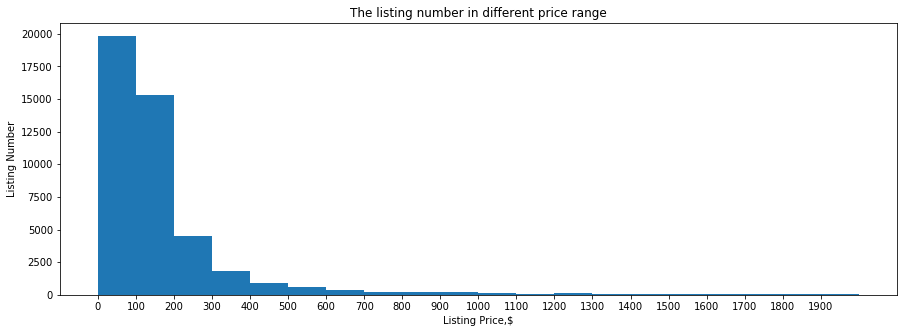

In [24]:
# calculate the average price for each listing
mean_price = listings_df.groupby('id').mean()['price']

#Finding the price range using hist funcgion plotting
plt.figure(figsize = (15,5))
plt.hist(mean_price,range = (0,2000),bins=20)
plt.xticks(np.arange(0,2000,step=100))
plt.xlabel('Listing Price,$')
plt.ylabel('Listing Number')
plt.title('The listing number in different price range')

It's obvious that the majority of listings is conventrated around 0~100 USD

### What are the busiest times of the year to visit los angeles?

In this part, we will focus on the listing price changes within 2019

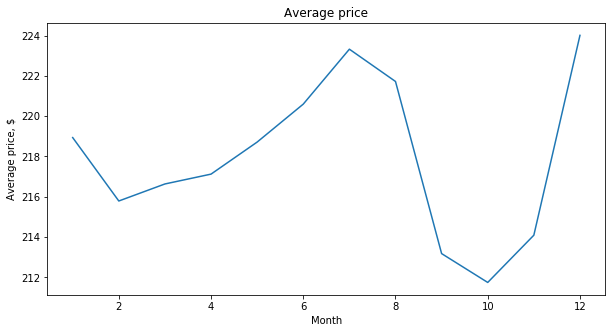

In [25]:
#find average price by month
average_price_by_month = calendar_df.groupby(['month'])['price'].mean()

#plot
plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')

plt.savefig('average price for month')

plt.show()

According to the diagrame above the listing price raise significantlu in december. In the meanwhile, there is also a small peak during the summer. This is probably due to the summer and winter holidays. However it is still obvious that the winter is the most busiest time to visit los angeles.

### Price Dependence on Neighbourhood

First let's count the total no of listing by location in Los Angeles

In [26]:
listings_df['neighbourhood_cleansed'].value_counts().head(20)

Venice                  2641
Hollywood               2621
Downtown                1745
Long Beach              1727
Santa Monica            1192
Hollywood Hills         1081
Westlake                 979
Koreatown                901
Mid-Wilshire             867
West Hollywood           808
Silver Lake              796
East Hollywood           778
Hollywood Hills West     767
Sawtelle                 707
Echo Park                700
Westwood                 686
Beverly Grove            678
North Hollywood          618
Mid-City                 609
Beverly Hills            609
Name: neighbourhood_cleansed, dtype: int64

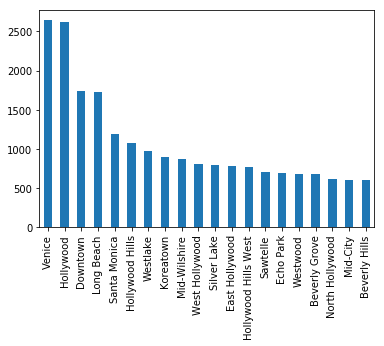

In [27]:
listings_df['neighbourhood_cleansed'].value_counts().head(20).plot(kind='bar')

In [219]:
location_mean_price = listings_df.groupby(['neighbourhood_cleansed']).mean()['price']
location_mean_price = pd.Series(location_mean_price)

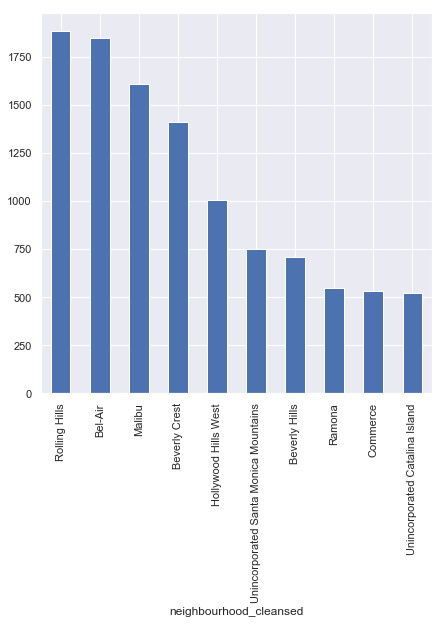

In [221]:
location_mean_price.sort_values(ascending=False).head(10).plot(kind='bar')

The venice, hollywood, downtown, long beach and santa monica are the top 5 area with most listing available.
<br /> The Rolling hills, bel-air, malibu, beverly crest and Hollywood Hills Wests are the top 5 area with most expensive listing price.

### Using Maps to Analyse The Spread of Listings In Los Angeles and Relation of Neighbourhood

In [28]:
len(listings_df['latitude'])

45053

In [29]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [30]:
m = folium.Map(location=[34.05, -118.24], zoom_start = 11)

heat_data = [[row['latitude'],row['longitude']] for index, row in
             listings_df[['latitude', 'longitude']].iterrows()]

hh =  HeatMap(heat_data).add_to(m)

m\

### Correlation between Price and Features

It is useful to look on correlations between price and other features from the dataset to find which are the most relevant features on house rental prices

In [37]:
import seaborn as sns

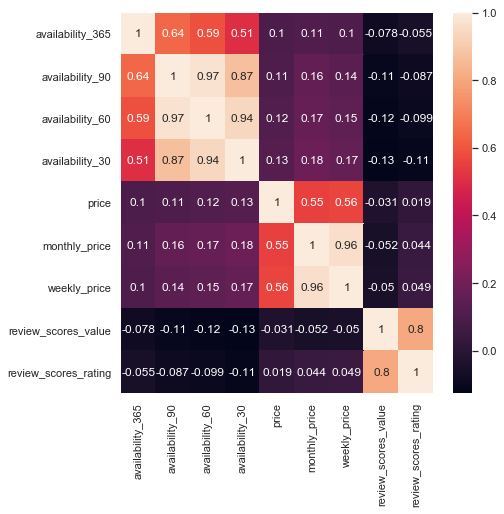

In [40]:
sns.heatmap(
    listings_df[['availability_365','availability_90','availability_60','availability_30','price','monthly_price',
            'weekly_price','review_scores_value','review_scores_rating']].corr(),annot=True
)

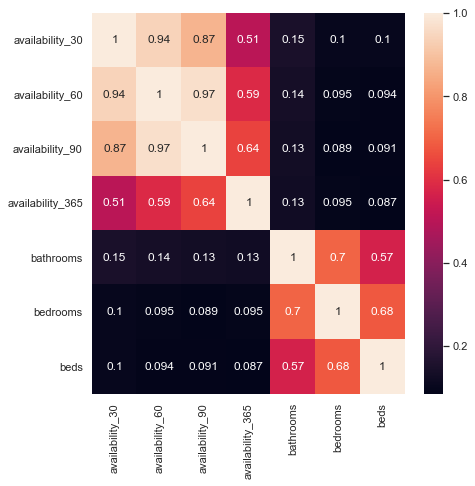

In [41]:
sns.heatmap(listings_df[['availability_30','availability_60','availability_90',
                    'availability_365','property_type','room_type','bathrooms','bedrooms','beds']].corr(),annot=True)

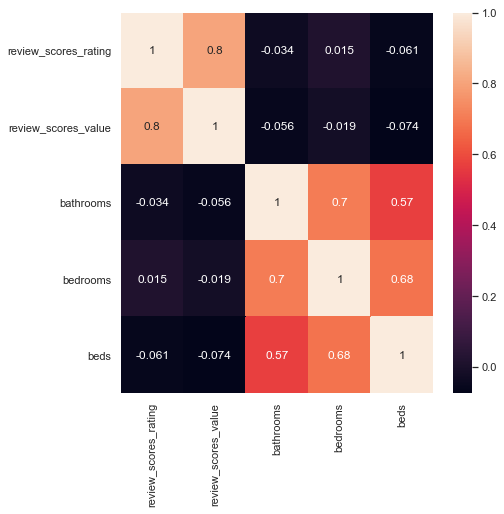

In [42]:
sns.heatmap(listings_df[['review_scores_rating','review_scores_value', 'property_type',
                    'room_type','bathrooms','bedrooms','beds']].corr(),annot=True)

From the correlation heatmap diagram, it is quite obvious that the price is correlated with number of bathrooms,bedrooms and beds.

## Data Modeling

### K Nearest Neighbors 

Usually for the house price prediction, KNN is one of the most common machine learning algorithms used. 

In [169]:
# Extracting the numeric columns in dataset
numeric_listing_df = listings_df._get_numeric_data()
numeric_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45053 entries, 0 to 45052
Data columns (total 50 columns):
id                                              45053 non-null int64
scrape_id                                       45053 non-null int64
thumbnail_url                                   0 non-null float64
medium_url                                      0 non-null float64
xl_picture_url                                  0 non-null float64
host_id                                         45053 non-null int64
host_acceptance_rate                            0 non-null float64
host_listings_count                             45037 non-null float64
host_total_listings_count                       45037 non-null float64
neighbourhood_group_cleansed                    0 non-null float64
latitude                                        45053 non-null float64
longitude                                       45053 non-null float64
accommodates                                    45053 non-null in

In [170]:
# Droping irrelevant columns
numeric_listing_df = numeric_listing_df.drop(['longitude','latitude','thumbnail_url','medium_url','xl_picture_url','host_acceptance_rate','neighbourhood_group_cleansed','square_feet'],axis = 1)
numeric_listing_df= numeric_listing_df.dropna(axis=0)
# Ready Data for use
numeric_listing_df.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,20190914032935,521,1.0,1.0,6,2.0,2.0,3.0,122.0,...,10.0,6.0,8.0,10.0,8.0,1,1,0,0,0.02
2,2708,20190914032935,3008,2.0,2.0,1,1.5,1.0,1.0,79.0,...,10.0,10.0,10.0,10.0,10.0,2,0,2,0,0.33
9,6931,20190914032935,3008,2.0,2.0,1,1.5,1.0,1.0,99.0,...,10.0,10.0,10.0,9.0,9.0,2,0,2,0,0.14
11,7992,20190914032935,22363,2.0,2.0,4,1.0,1.0,2.0,90.0,...,10.0,10.0,10.0,10.0,10.0,2,2,0,0,2.16
22,15089,20190914032935,59169,2.0,2.0,2,1.0,1.0,1.0,89.0,...,9.0,9.0,10.0,10.0,10.0,1,1,0,0,0.45


In [201]:
# Calculate the correlation between the target features and value
numeric_listing_df.iloc[:,4:10].corr()

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price
host_total_listings_count,1.000000,0.130083,0.259518,0.037418,0.115023,-0.003145
accommodates,0.130083,1.000000,0.359872,0.773342,0.819916,0.435194
bathrooms,0.259518,0.359872,1.000000,0.441708,0.363971,0.297114
bedrooms,0.037418,0.773342,0.441708,1.000000,0.748306,0.448179
beds,0.115023,0.819916,0.363971,0.748306,1.000000,0.383385
price,-0.003145,0.435194,0.297114,0.448179,0.383385,1.000000


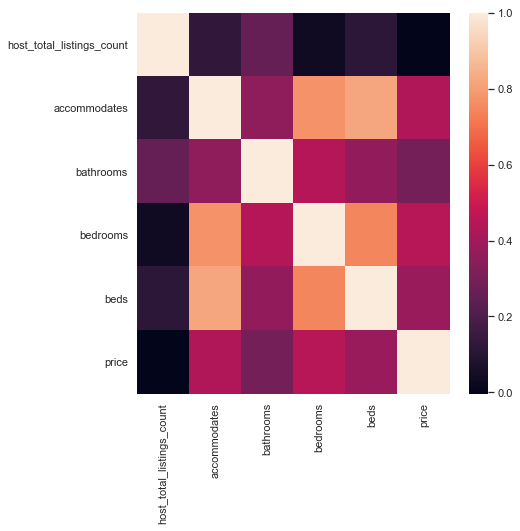

In [202]:
# Using heatmap for visual representation
sns.heatmap(numeric_listing_df.iloc[:,4:10].corr())

In [194]:
# Test and Train set split
from sklearn.model_selection import train_test_split
x=numeric_listing_df.iloc[:,4:9]
y=numeric_listing_df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [195]:
# Import KNN model and begin with a trail value for K around 3
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(pred)

[222.         141.33333333 147.66666667 ... 176.          87.66666667
  80.66666667]


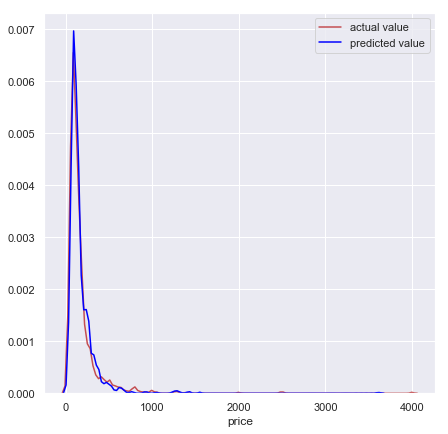

In [196]:
#Plotting the distribution plot
ax1=sns.distplot(y_test,hist=False,color='r',label='actual value')
ax2=sns.distplot(pred,hist=False,color='blue',label='predicted value')

In [197]:
# Calculate RMSE for finding the optimal value of K
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from math import sqrt
rmse=list()
rmse1=list()
new=list()
mylist=list(range(50))
mylist=list(filter(lambda x:x%2!=0,mylist))
for k in mylist:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    pred1=knn.predict(x_train)
    error=sqrt(mean_squared_error(y_test,pred)) 
    error1=sqrt(mean_squared_error(y_train,pred1))
    rmse.append(error)
    new.append([error,k])
    rmse1.append(error1)
    print('RMSE test value for k= ' , k , 'is:', error, '\nRMSE train value for k is = ',error1)

RMSE test value for k=  1 is: 357.93905540400664 
RMSE train value for k is =  76.31311262752186
RMSE test value for k=  3 is: 215.26636297636492 
RMSE train value for k is =  203.94158343604337
RMSE test value for k=  5 is: 199.17442608720745 
RMSE train value for k is =  230.58277199984005
RMSE test value for k=  7 is: 198.23625591511305 
RMSE train value for k is =  249.19428825165156
RMSE test value for k=  9 is: 192.6046533191715 
RMSE train value for k is =  263.5885432154807
RMSE test value for k=  11 is: 194.2369212845346 
RMSE train value for k is =  269.9065155630354
RMSE test value for k=  13 is: 191.10083740707944 
RMSE train value for k is =  272.14787776927864
RMSE test value for k=  15 is: 192.3681591271221 
RMSE train value for k is =  272.52427444045986
RMSE test value for k=  17 is: 190.9501513663445 
RMSE train value for k is =  274.04137437749665
RMSE test value for k=  19 is: 190.90277195248257 
RMSE train value for k is =  275.64648313096046
RMSE test value for k=

In [198]:
newList=list()
for x in mylist:
    newList.append(1/x)

In [199]:
# Finding the minimum RMSE for testing data,which is optimal K value
Rmsetest=min(new)
print("Minimum R squared test error=",Rmsetest[0])
Rmsetrain=min(rmse1)
print("Minimum R squared train error=",Rmsetrain)
print("Optimal K value= ",Rmsetest[1])

Minimum R squared test error= 188.09725302410044
Minimum R squared train error= 76.31311262752186
Optimal K value=  33


Text(0, 0.5, 'R squared test error')

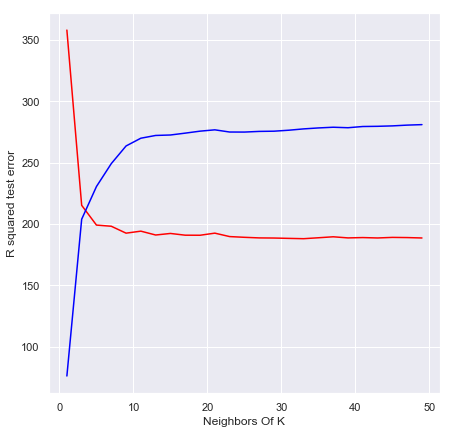

In [200]:
# Plot graph between RMSE value and K value
plt.plot(mylist,rmse,color='red')
plt.plot(mylist,rmse1,color='blue')
plt.xlabel('Neighbors Of K')
plt.ylabel('R squared test error')

According to the result above, the optimal value of K would be 33

## Result and Conclusion

In this notebook, I focus on three business problems and predicted the resevation price using KNN machine learning algorithm regarding the Los Angeles Airbnb dataset.
<br />Based on the graph from price dependence on the neighrhood, The venice, hollywood, downtown, long beach and santa monica are the top 5 area with most listing available.The Rolling hills, bel-air, malibu, beverly crest and Hollywood Hills Wests are the top 5 area with most expensive listing price.
<br /> And the busiest time in year for visting Los Angelese would be summer and winter hoildays. This is represented in the listing price change during the year.
<br /> The basic features of listing, which are number of bathrooms,bedrooms and beds, are the most correlated features with listing price